# Pima Indians Diabetes Database

Pima Indians Diabetes Database sadrži medicinske prediktorne varijable: broj trudnoća, razinu glukoze, krvni pritisak, debljinu kože, razinu inzulina, BMI, starost, DPF (Diabetes pedigree function) i jednu target varijablu, 'Outcome'. Cilj skupa podataka je predvidjeti ima li pacijent dijabetes na temelju dijagnostičkih mjerenja. Svi pacijenti su žene starije od 21 godine.

## Učitavanje potrebnih biblioteka

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Učitavanje podataka

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.index

RangeIndex(start=0, stop=768, step=1)

Index skupa podataka je ispravno postavljen te ga nije potrebno ručno postavljati.

In [4]:
df.shape

(768, 9)

## Tipovi podataka

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Svi podatci su numerički što je i očekivano s obzirom na varijable koje se nalaze u skupu podataka. Nije potrebno mijenjati tipove podataka.

## Deskriptivna statistika

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Nedostajuće vrijednosti

In [8]:
# Nedostajuće vrijednost

nan_cnt = df.isnull().sum(axis=0)
nan_cnt.value_counts

<bound method IndexOpsMixin.value_counts of Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64>

In [9]:
# Vrijednosti jednake nuli

zero_cnt = df.eq(0).sum(axis=0)
zero_cnt.value_counts

<bound method IndexOpsMixin.value_counts of Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64>

In [10]:
# Postotak vrijednonsti jednakih nuli

df.eq(0).sum(axis=0) / len(df) * 100

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

Ovaj skup podataka ne sadrži nedostajuće vrijednosti tipa NaN, no postoje vrijednosti koje su jednake nuli (kolonu 'Pregnanices ovdje zanemarujem jer ta kolona smije sadržavati vrijednost 0). Potrebno je nad tim kolonama odraditi imputaciju podataka. Različite se metode koriste ovisno o tome jesu li podaci numerički ili kategoričiki. Ukoliko su podaci numerički, podaci se mogu imputirati tako što se umjesto nedostajuće vrijednosti stavi srednja vrijednost, medijan ili mod. Korištenje medijana i moda ima prednost u tome što na njega ne utječu outlieri koliko na srednju vrijednost. S druge strane, ove metode ne uzimaju u obzir koreliranost podataka. Također je moguće koristit kNN metodu gdje se nedostajeća vrijednost zamijeni ovisno o primjerima koji su najbliži primjeru koji je u pitanju. Ova je metoda posebice korisna kada kolona sadrži jako velik broj nedostajućih vrijednosti jer bi zamjena nedostajućih vrijednosti u takvoj koloni srednjom vrijednošću ili medijanom znatno utjecala na distribuciju te kolone. Moguće je i u potpunosti zanemarati neku od kolona ukoliko je broj nedostajućih vrijednosti prevelik.

Kod kategoričkih varijabli je češće korištenje moda (najčešće vrijednsoti) kao zamjenu za nedostajuće vrijednosti, no takve varijable ne postoje u ovom skupu podataka.

Kolonama 'BloodPressure', 'BMI', te 'SkinThickness' ću vrijednosti 0 zamijeniti medijanom, a koloni 'Insulin' kNN metodom jer je toj koloni čak 48.7% vrijednosti 0. Redove gdje je vrijednost kolone 'Glucose' jednaka nuli uklanjam iz skupa podataka jer je takvih podataka malo.

### Glucose

In [11]:
df = df[df['Glucose'] != 0]

In [12]:
df.shape

(763, 9)

### BloodPressure

In [13]:
bloodpressure_median = df['BloodPressure'].median()
bloodpressure_median

72.0

In [14]:
df.loc[df['BloodPressure'] == 0, 'BloodPressure'] = bloodpressure_median

### BMI

In [15]:
bmi_median = df['BMI'].median()
bmi_median

32.0

In [16]:
df.loc[df['BMI'] == 0, 'BMI'] = bmi_median

### SkinThickness

In [17]:
skinthickenss_median = df['SkinThickness'].median()
skinthickenss_median

23.0

In [18]:
df.loc[df['SkinThickness'] == 0, 'SkinThickness'] = skinthickenss_median

### Insulin

In [19]:
from sklearn.impute import KNNImputer

df.loc[df['Insulin'] == 0, 'Insulin'] = np.nan

imputer = KNNImputer(n_neighbors = 3)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [20]:
# Postotak vrijednonsti jednakih nuli

df.eq(0).sum(axis=0) / len(df) * 100

Pregnancies                 14.547837
Glucose                      0.000000
BloodPressure                0.000000
SkinThickness                0.000000
Insulin                      0.000000
BMI                          0.000000
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.137615
dtype: float64

## Stršeće vrijednosti

In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,72.418087,27.319790,151.996068,32.448100,0.472477,33.271298,0.348624
std,3.374729,30.535641,12.098656,9.232629,99.190570,6.878946,0.331963,11.772161,0.476847
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,84.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,132.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,185.000000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


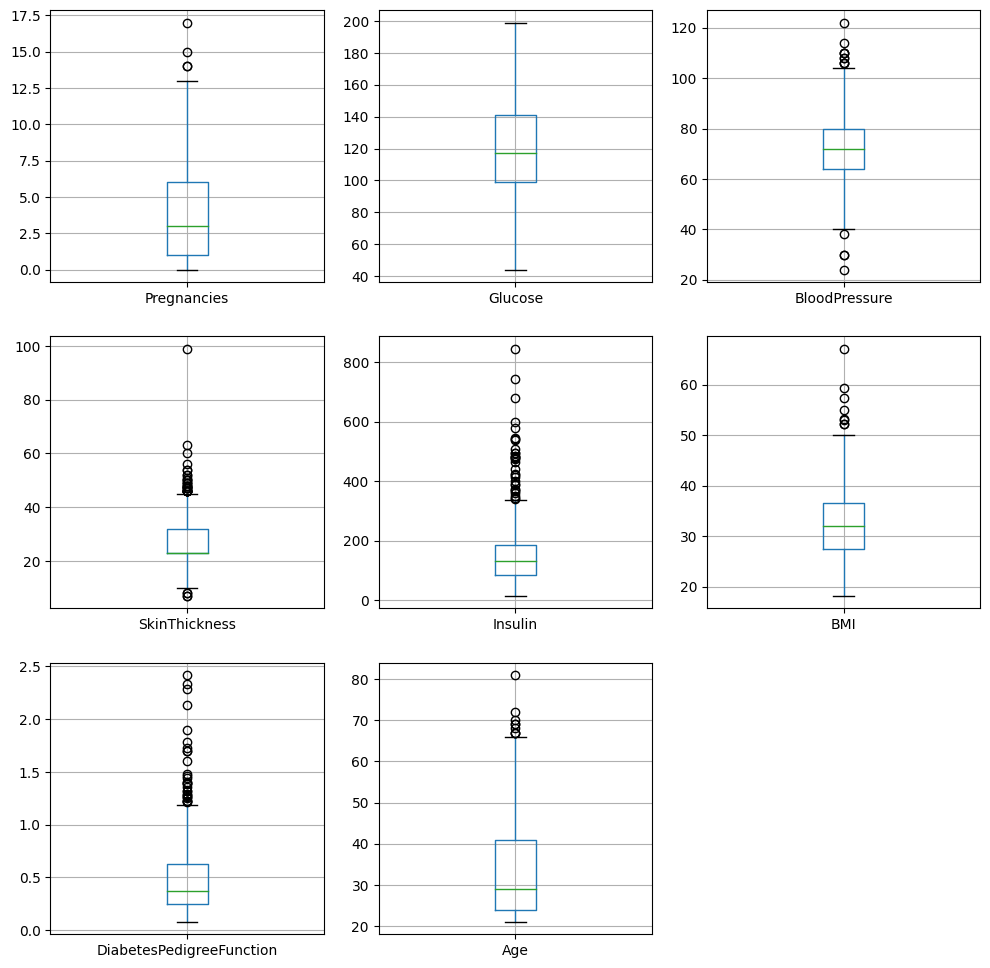

In [22]:
plt.figure(figsize=(12,12))

for col,i in zip(df.columns, range(1, len(df.columns))):
    plt.subplot(3,3,i)
    df[[col]].boxplot()
    

C:\Users\pebe1\AppData\Local\Temp\ipykernel_14308\3637677604.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

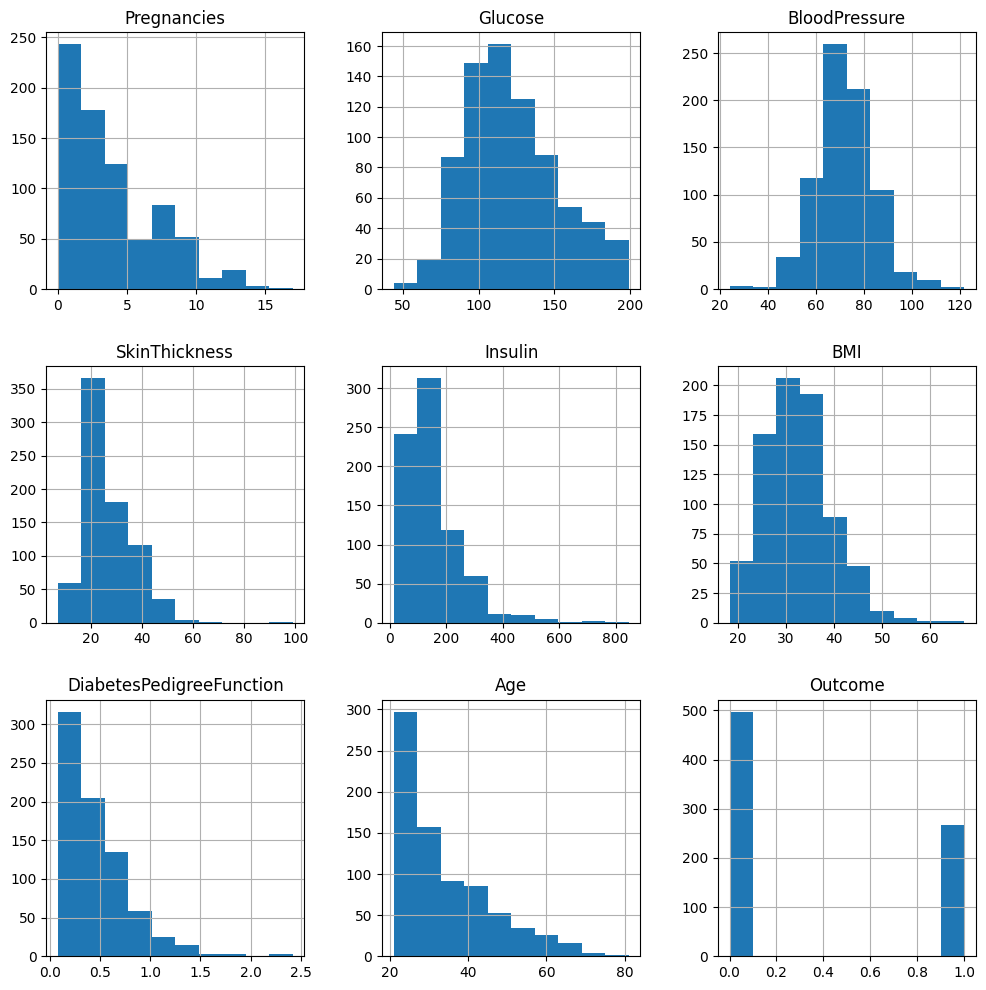

In [23]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df.hist(ax = ax)

Iz prikazanih grafova te statistike podataka se čini da kolone 'DiabetesPedigreeFunction' i 'Insulin' sadrže stršeće vrijednosti, no odstupanja nisu ekstremna. Sasvim je moguće da su to stvarne vrijednosti te ću ih stoga ostaviti u skupu podataka.

## Vizualizacija i odabir značajki

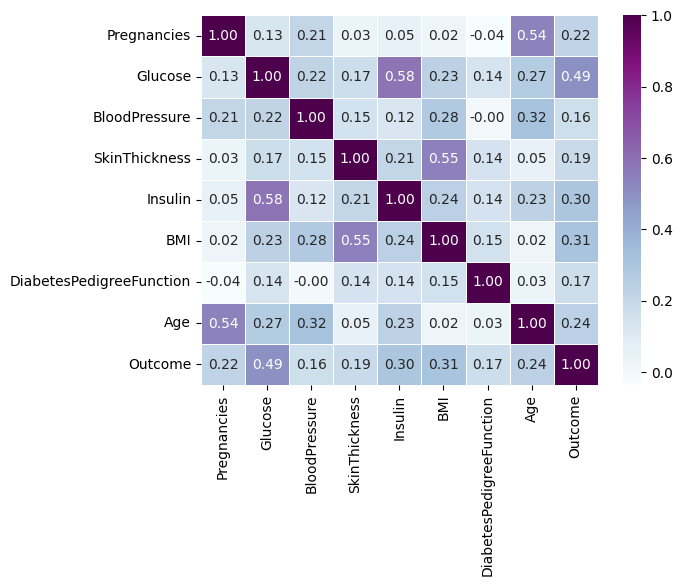

In [28]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="BuPu", linewidths=.5)
plt.show()

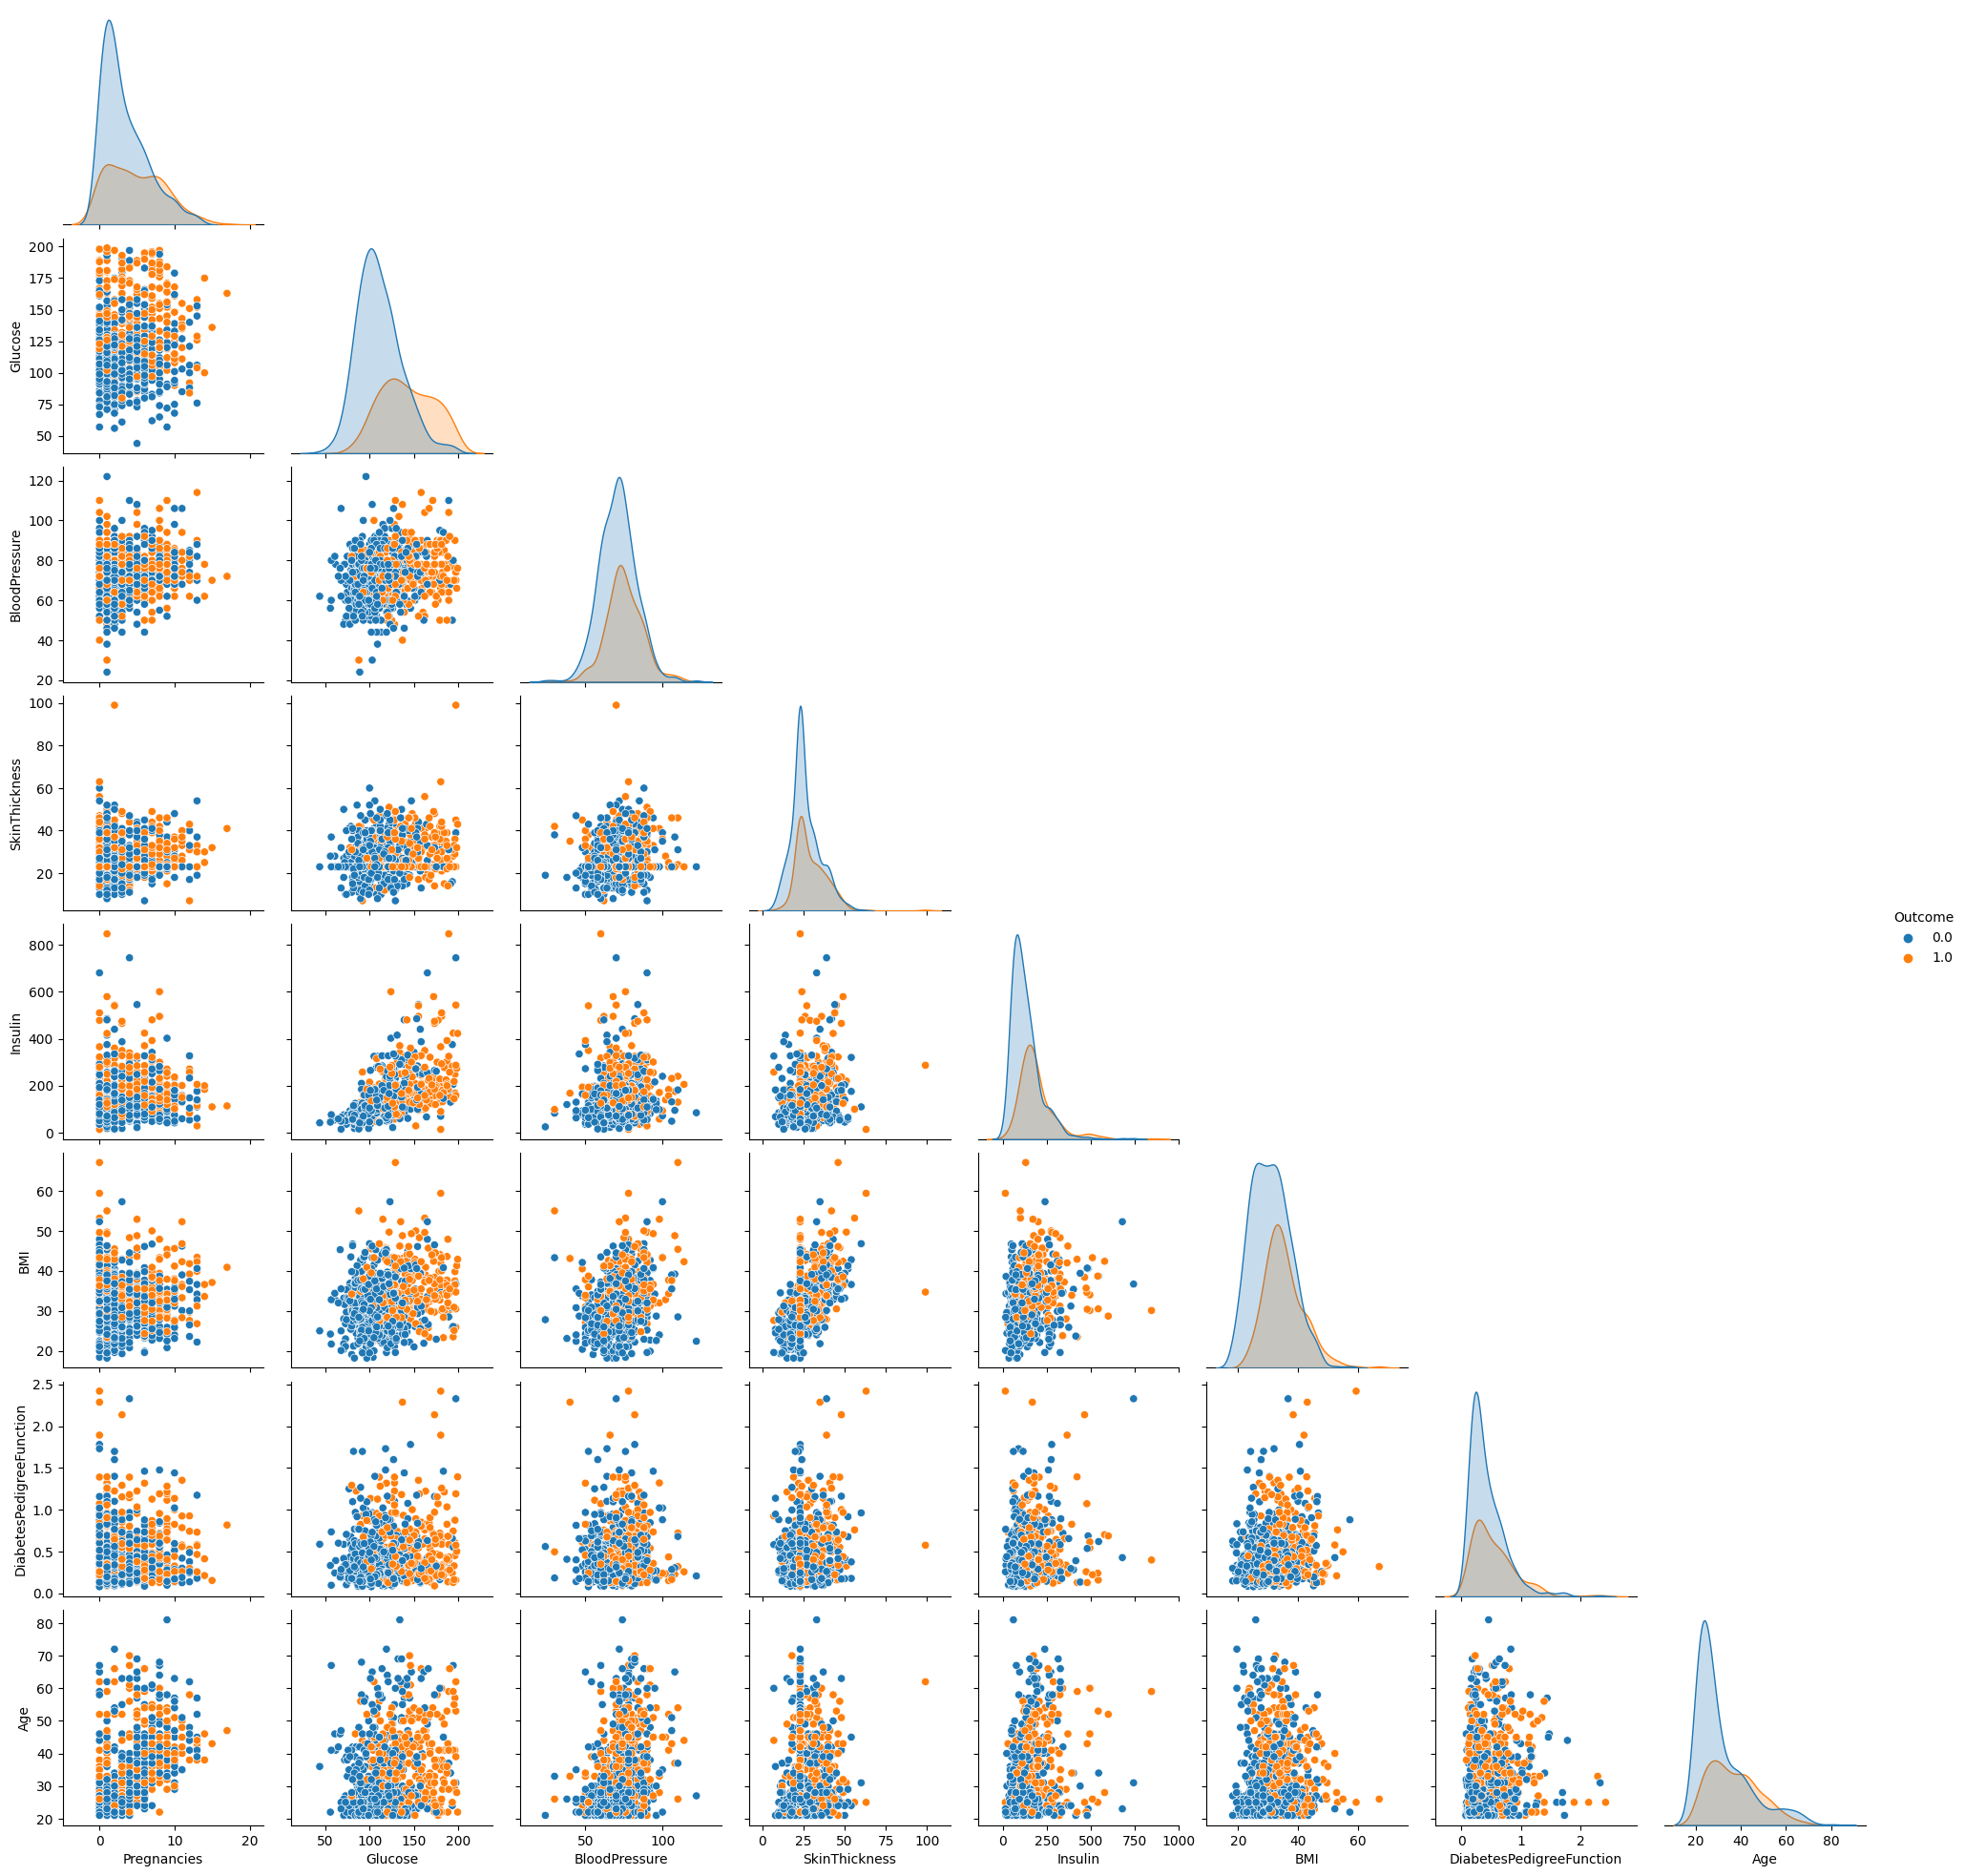

In [30]:
sns.pairplot(df, hue="Outcome", corner=True)
plt.show()

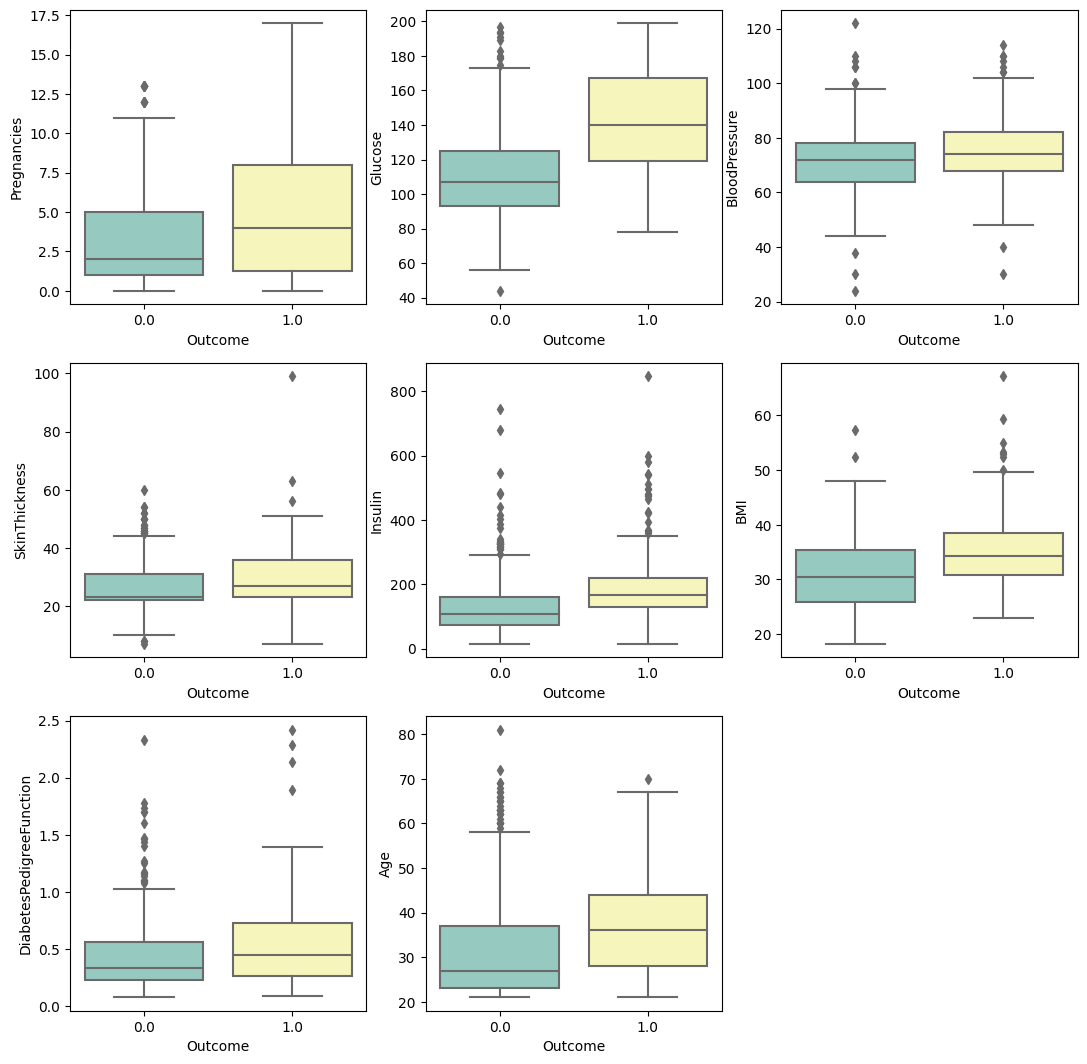

In [43]:
plt.figure(figsize=(13,13))

for col,i in zip(df.columns[df.columns != 'Outcome'], range(1, len(df.columns))):
    plt.subplot(3,3,i)
    sns.boxplot(x="Outcome", y=col, data=df, palette="Set3")


Text(0.5, 1.0, 'Pregnancies for patients without diabetes')

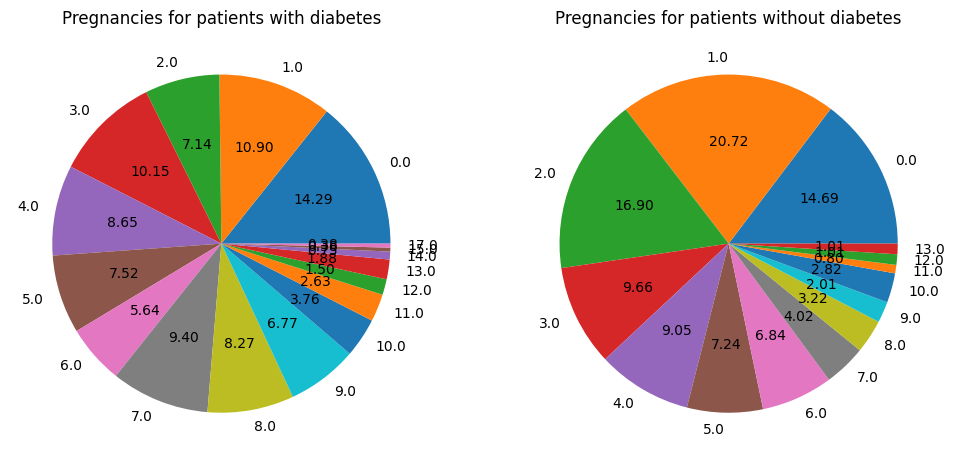

In [58]:
df_diabetes = df.loc[df['Outcome'] == 1, :]
df_non_diabtes = df.loc[df['Outcome'] == 0, :]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

count_per_title = df_diabetes.groupby('Pregnancies').count().loc[:,'Outcome'].values
title_name = df_diabetes.groupby('Pregnancies').count().index.values

ax1.pie(count_per_title, labels=title_name, autopct='%.2f')
ax1.set_title("Pregnancies for patients with diabetes")



count_per_title = df_non_diabtes.groupby('Pregnancies').count().loc[:,'Outcome'].values
title_name = df_non_diabtes.groupby('Pregnancies').count().index.values

ax2.pie(count_per_title, labels=title_name, autopct='%.2f')
ax2.set_title("Pregnancies for patients without diabetes")


## Normalizacija

Normalizacija se koristi da bi se numeričke kolone svele na zajedničku skalu. Ovaj je korak bitan pri treniranju modela jer bi neke značajke mogle imati veću težinu u predikciji zbog toga što je njihova skala veća, a to nije poželjan efekt jer ne želimo da neka kolona ima veći utjecaj na predikciju zbog raspona vrijednosti nego zbog relativnog utjecaja na ciljnu varijablu. Normalizacija također pomaže u bržoj konvergenciji modela jer osigurava da su značajkeu istom rasponu. Također, prevelike ili premale vrijednosti mogu prouzrokovati numeričke probleme.

In [36]:
df_z_normalized = df.copy() 

# Ne želimo normalizirati Outcome kolonu
for column in df.loc[:, df.columns != 'Outcome'].columns: 
    df_z_normalized[column] = (df[column] -
                           df[column].mean()) / df_z_normalized[column].std() 

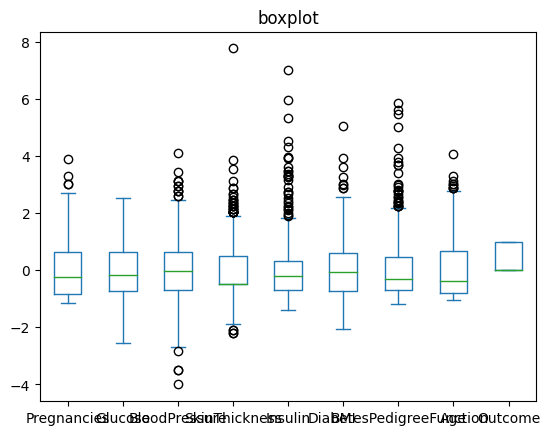

In [37]:
ax = df_z_normalized.plot(kind='box', title='boxplot')
plt.show()

## Podjela skupa podataka na za fazu treniranja

In [31]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_z_normalized, test_size=0.2, random_state=42)
df_train, df_val =  train_test_split(df_train, test_size=0.2, random_state=42)

In [32]:
X_train = df_train.drop(['Outcome'], axis=1)
y_train = df_train['Outcome']

X_val = df_val.drop(['Outcome'], axis=1)
y_val = df_val['Outcome']

X_test = df_test.drop(['Outcome'], axis=1)
y_test = df_test['Outcome']

## Treniranje modela